Index number : 190026T

Name         : AHAMED M.I.I

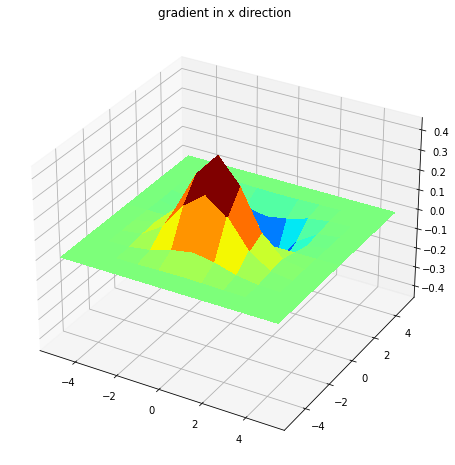

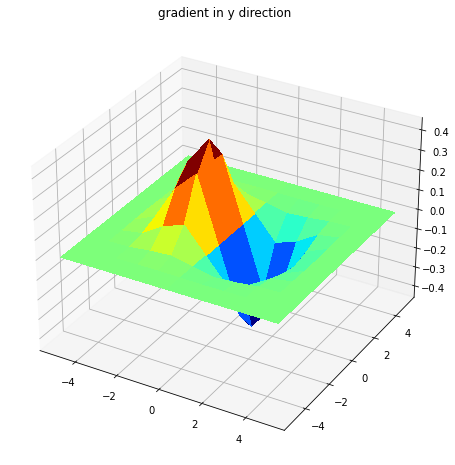

In [2]:
#1)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

delta = 1
X, Y = np.meshgrid(np.arange(-5, 5 + delta, delta), np.arange(-5, 5 + delta, delta))

sigma = 1
gaussian = np.exp(-(X**2 + Y**2)/(2*sigma**2))
gaussian = gaussian/np.sum(gaussian)

kernel_y = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype = np.float32)
gaussian_x = cv.filter2D(gaussian, -1, kernel_y)

kernel_x = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype = np.float32)
gaussian_y = cv.filter2D(gaussian, -1, kernel_x)

fig1, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
ax.title.set_text('gradient in x direction')
surf = ax.plot_surface(X, Y, gaussian_x, cmap=cm.jet,
                       linewidth=0, antialiased=False)

fig2, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
ax.title.set_text('gradient in y direction')
surf = ax.plot_surface(X, Y, gaussian_y, cmap=cm.jet,
                       linewidth=0, antialiased=False)

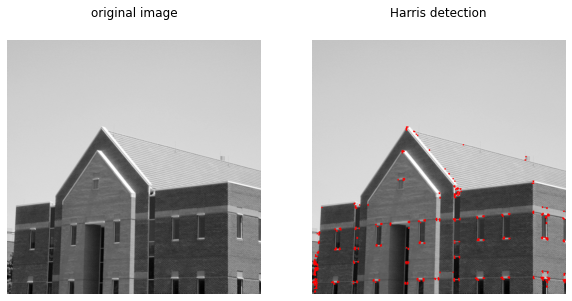

In [21]:
#2)
building = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_04\building.tif')
assert building is not None

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(building, cmap = 'gray', vmin =0, vmax=255)
ax[0].title.set_text('original image')
ax[0].axis('off')
ax[0].xaxis.tick_top()

gray_building = cv.cvtColor(building, cv.COLOR_BGR2GRAY)
gray_building = np.float32(gray_building)

harris = cv.cornerHarris(gray_building, 2, 5, 0.07)
harris = cv.dilate(harris, None)
threshold = 0.01
building[harris > threshold * harris.max()]=[255, 0, 0]

ax[1].imshow(building, cmap = 'gray', vmin =0, vmax=255)
ax[1].title.set_text('Harris detection')
ax[1].axis('off')
ax[1].xaxis.tick_top()


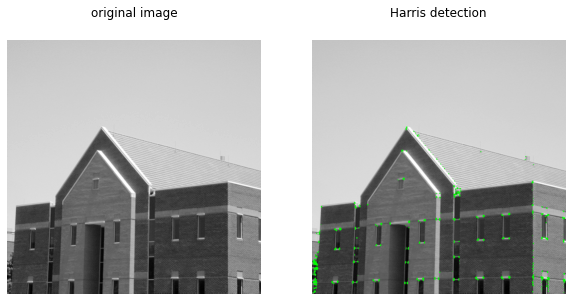

In [29]:
#3)
building = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_04\building.tif')
assert building is not None

I = cv.cvtColor(building, cv.COLOR_BGR2GRAY)
I = np.float32(I)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(I, cmap = 'gray', vmin =0, vmax=255)
ax[0].title.set_text('original image')
ax[0].axis('off')
ax[0].xaxis.tick_top()

kernel_y = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype=np.float32)
kernel_x = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype=np.float32)

Ix = cv.filter2D(I, -1, kernel_y)
Iy = cv.filter2D(I, -1, kernel_x)

m11 = cv.GaussianBlur(Ix*Ix, (3,3), 7)
m12 = cv.GaussianBlur(Ix*Iy, (3,3), 7)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy, (3,3), 7)

det = m11*m22 - m12*m21
trace = m11 + m22
alpha = 0.04
R = det - alpha*trace**2
threshold = 0.005
building[R > threshold*R.max()]=[0, 255, 0]

ax[1].imshow(building, cmap = 'gray')
ax[1].title.set_text('Harris detection')
ax[1].axis('off')
ax[1].xaxis.tick_top()

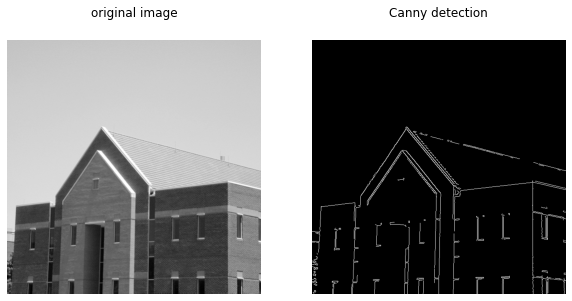

In [26]:
#4)
building = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_04\building.tif')
assert building is not None

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(building, cmap = 'gray', vmin =0, vmax=255)
ax[0].title.set_text('original image')
ax[0].axis('off')
ax[0].xaxis.tick_top()

canny = cv.Canny(building, 200, 300)

ax[1].imshow(canny, cmap = 'gray', vmin =0, vmax=255)
ax[1].title.set_text('Canny detection')
ax[1].axis('off')
ax[1].xaxis.tick_top()